In [1]:
import pandas as pd
import datetime
from pandas import DataFrame
import seaborn as sb
from matplotlib import pyplot

In [2]:
#Load in and merge the relevant datasets to create dataframe, df, to work with
data1=pd.read_csv("content-dwelltime.csv")
data2=pd.read_csv("content_update.csv")
df=pd.merge(data1,data2, left_on="content_id",right_on="page_ptr_id").drop("content_id",axis="columns")
df=df.drop("Unnamed: 0",axis="columns")
df

,id,start_time,end_time,app_user_id,page_ptr_id,body,description,summary,type,pub_date,created_on,category_id,Category,title
0,1,2020-03-13 10:01:11+00,2020-03-13 10:01:13+00,2,57,"[{""type"": ""text"", ""value"": {""text"": ""<p>For no...",<p><b>Contact information for non-urgent menta...,Non-urgent concerns.,text,2020-03-10,2020-05-05,4,Links,Unable to Cope
1,36,2020-03-17 16:41:45+00,2020-03-17 16:41:48+00,9,57,"[{""type"": ""text"", ""value"": {""text"": ""<p>For no...",<p><b>Contact information for non-urgent menta...,Non-urgent concerns.,text,2020-03-10,2020-05-05,4,Links,Unable to Cope
2,67,2020-03-19 10:54:26+00,2020-03-19 10:55:45+00,11,57,"[{""type"": ""text"", ""value"": {""text"": ""<p>For no...",<p><b>Contact information for non-urgent menta...,Non-urgent concerns.,text,2020-03-10,2020-05-05,4,Links,Unable to Cope
3,485,2020-04-09 10:38:23+00,2020-04-09 10:38:27+00,11,57,"[{""type"": ""text"", ""value"": {""text"": ""<p>For no...",<p><b>Contact information for non-urgent menta...,Non-urgent concerns.,text,2020-03-10,2020-05-05,4,Links,Unable to Cope
4,539,2020-04-21 10:21:59+00,2020-04-21 10:22:36+00,51,57,"[{""type"": ""text"", ""value"": {""text"": ""<p>For no...",<p><b>Contact information for non-urgent menta...,Non-urgent concerns.,text,2020-03-10,2020-05-05,4,Links,Unable to Cope
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9809,10394,2021-05-15 19:54:36+00,2021-05-15 19:54:43+00,2944,117,"[{""type"": ""animated"", ""value"": {""url"": ""https:...",<p>Watch this short intro on how to use SAM</p>,Watch this short intro on how to use SAM,selfHelpTool,2020-11-13,2020-11-22,8,Visual Exercise,Pinned
9810,10395,2021-05-15 22:08:55+00,2021-05-15 22:13:26+00,2946,117,"[{""type"": ""animated"", ""value"": {""url"": ""https:...",<p>Watch this short intro on how to use SAM</p>,Watch this short intro on how to use SAM,selfHelpTool,2020-11-13,2020-11-22,8,Visual Exercise,Pinned
9811,10403,2021-05-16 04:23:59+00,2021-05-16 04:28:25+00,2948,117,"[{""type"": ""animated"", ""value"": {""url"": ""https:...",<p>Watch this short intro on how to use SAM</p>,Watch this short intro on how to use SAM,selfHelpTool,2020-11-13,2020-11-22,8,Visual Exercise,Pinned
9812,10406,2021-05-16 10:35:04+00,2021-05-16 10:35:32+00,2950,117,"[{""type"": ""animated"", ""value"": {""url"": ""https:...",<p>Watch this short intro on how to use SAM</p>,Watch this short intro on how to use SAM,selfHelpTool,2020-11-13,2020-11-22,8,Visual Exercise,Pinned


In [3]:
#Mean amount of time per page
df["duration"] = pd.to_datetime(df["end_time"]) - pd.to_datetime(df["start_time"])
df["duration"].mean()

Timedelta('0 days 00:02:02.667312003')

In [4]:
#Mean time spent on each page
PageMeans=df.groupby(['page_ptr_id'])["duration"].mean(numeric_only=False)
PageM=pd.DataFrame(PageMeans)

In [5]:
PageM = PageM.reset_index()
PageM.columns=["Page Number","Mean Duration"]
PageM.sort_values(by='Mean Duration', ascending=False)

,Page Number,Mean Duration
17,21,0 days 00:10:44.073529411
32,36,0 days 00:06:53.230769230
36,40,0 days 00:04:48.152671755
6,10,0 days 00:04:46.820668693
14,18,0 days 00:04:07.136604774
...,...,...
64,94,0 days 00:00:03
74,104,0 days 00:00:03
78,108,0 days 00:00:02.916666666
65,95,0 days 00:00:02.500000


In [6]:
#Total Time Spent on each page
PageTotalTime=df.groupby(['page_ptr_id'])["duration"].sum(numeric_only=False)
PageTT=pd.DataFrame(PageTotalTime)

In [7]:
PageTT = PageTT.reset_index()
PageTT.columns=["Page Number","Total Time"]
PageTT.sort_values(by='Total Time', ascending=False)

,Page Number,Total Time
14,18,2 days 03:45:41
80,117,1 days 13:46:27
12,16,1 days 08:42:42
36,40,1 days 07:27:24
6,10,1 days 02:12:44
...,...,...
66,96,0 days 00:00:10
58,78,0 days 00:00:08
65,95,0 days 00:00:05
70,100,0 days 00:00:04


In [8]:
#Most and least viewed pages overall
Clicks=df["page_ptr_id"].value_counts()
df_clicks = pd.DataFrame(Clicks)
df_clicks = df_clicks.reset_index()
df_clicks.columns = ['Page Number', "Clicks"] 
df_clicks

,Page Number,Clicks
0,16,1182
1,18,754
2,117,637
3,14,596
4,59,595
...,...,...
76,80,1
77,78,1
78,94,1
79,79,1


In [9]:
#Create new CSV file with page usage statistics
Usage=pd.merge(PageM, PageTT, on='Page Number')
Usage1=pd.merge(Usage, df_clicks, on="Page Number")
Usage1=Usage1.sort_values(by='Page Number', ascending=True)
Usage1.to_csv('pageusagestatistics.csv')

In [10]:
#Creating sub group for pages based on their target group
Anxiety=df[df["title"]=="Anxious"]
Coping= df[df["title"]=="Unable to Cope"]
Depression=df[df["title"]=="Depressed"]
Lonely=df[df["title"]=="Lonely"]

<AxesSubplot:xlabel='Page Number', ylabel='Clicks'>

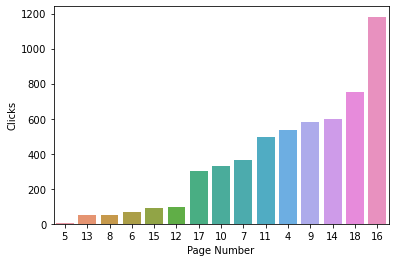

In [11]:
#Investigating which is the most clicked on pages recommended for anxiety
AClicks=Anxiety["page_ptr_id"].value_counts()
df_Aclicks = pd.DataFrame(AClicks)
df_Aclicks = df_Aclicks.reset_index()
df_Aclicks.columns = ['Page Number', "Clicks"] 
df_Aclicks = df_Aclicks.sort_values('Clicks').reset_index()
sb.barplot(x="Page Number", y="Clicks", data=df_Aclicks, order=df_Aclicks['Page Number'])

<AxesSubplot:xlabel='Page Number', ylabel='Clicks'>

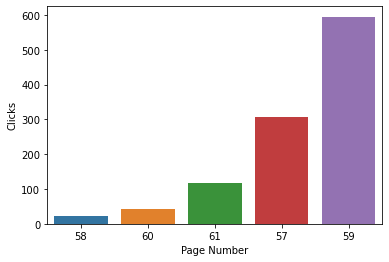

In [12]:
#Investigating which is the most clicked on pages recommended for coping
CClicks=Coping["page_ptr_id"].value_counts()
df_Cclicks = pd.DataFrame(CClicks)
df_Cclicks = df_Cclicks.reset_index()
df_Cclicks.columns = ['Page Number', "Clicks"] 
df_Cclicks = df_Cclicks.sort_values('Clicks').reset_index()
sb.barplot(x="Page Number", y="Clicks", data=df_Cclicks, order=df_Cclicks['Page Number'])

<AxesSubplot:xlabel='Page Number', ylabel='Clicks'>

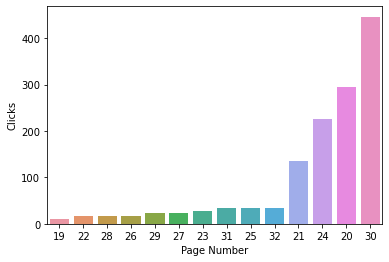

In [13]:
#Investigating which is the most clicked on pages recommended for depression
DClicks=Depression["page_ptr_id"].value_counts()
df_Dclicks = pd.DataFrame(DClicks)
df_Dclicks = df_Dclicks.reset_index()
df_Dclicks.columns = ['Page Number', "Clicks"] 
df_Dclicks = df_Dclicks.sort_values('Clicks').reset_index()
sb.barplot(x="Page Number", y="Clicks", data=df_Dclicks, order=df_Dclicks['Page Number'])

<AxesSubplot:xlabel='Page Number', ylabel='Clicks'>

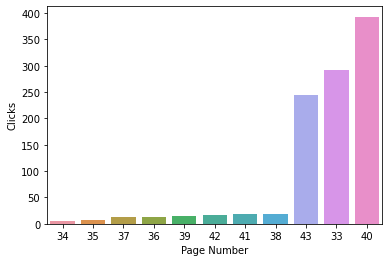

In [14]:
#Investigating which is the most clicked on pages recommended for loneliness
LClicks=Lonely["page_ptr_id"].value_counts()
df_Lclicks = pd.DataFrame(LClicks)
df_Lclicks = df_Lclicks.reset_index()
df_Lclicks.columns = ['Page Number', "Clicks"] 
df_Lclicks = df_Lclicks.sort_values('Clicks').reset_index()
sb.barplot(x="Page Number", y="Clicks", data=df_Lclicks, order=df_Lclicks['Page Number'])

In [15]:
#Time users have been on the site
UserTimes=df.groupby(['app_user_id'])["duration"].sum(numeric_only=False)
UserT=pd.DataFrame(UserTimes)
UserT = UserT.reset_index()
UserT.columns=["User ID","User Time"]
UserT.sort_values(by='User Time', ascending=False)

,User ID,User Time
817,1559,2 days 01:04:31
637,1246,0 days 23:23:18
1014,1860,0 days 18:39:55
96,197,0 days 16:07:32
779,1493,0 days 13:56:16
...,...,...
178,387,0 days 00:00:02
724,1390,0 days 00:00:02
1383,2459,0 days 00:00:01
166,369,0 days 00:00:01


In [16]:
UserT["User Time"].describe()
#Average time a user spends on site is 12 mins. 75 % of users spend less than 4 mins 40s

count                         1677
mean     0 days 00:11:57.863446630
std      0 days 01:37:03.145085022
min                0 days 00:00:01
25%                0 days 00:00:23
50%                0 days 00:01:29
75%                0 days 00:04:37
max                2 days 01:04:31
Name: User Time, dtype: object

In [17]:
#Types of pages on the site (loosely categorised based on description given)
data2["Category"].value_counts()

Information          41
Mental Exercise      22
Links                17
Physical Exercise     6
Audio Exercise        5
Other                 4
Written Exercise      3
Creative Exercise     2
Visual Exercise       2
Animation             1
Name: Category, dtype: int64

<AxesSubplot:xlabel='Category', ylabel='Count'>

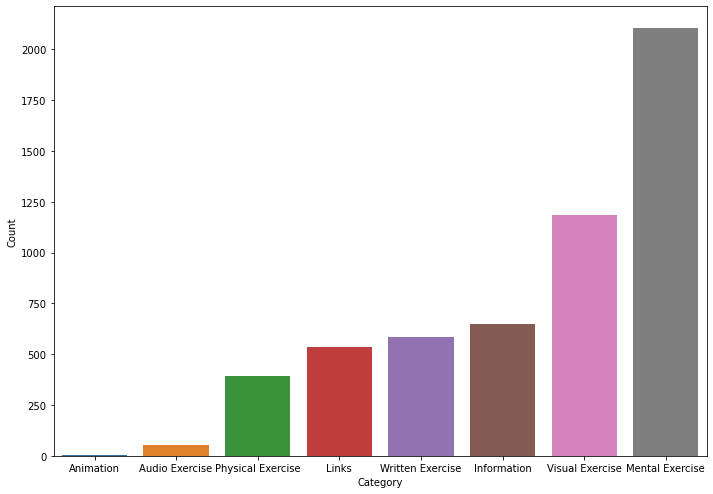

In [18]:
#Categories most selected for anxiety
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
ACategories=Anxiety["Category"].value_counts()
df_ACategories = pd.DataFrame(ACategories)
df_ACategories = df_ACategories.reset_index()
df_ACategories.columns = ['Category', "Count"] 
df_ACategories = df_ACategories.sort_values('Count').reset_index()
sb.barplot(x="Category", y="Count", data=df_ACategories, order=df_ACategories['Category'])

<AxesSubplot:xlabel='Category', ylabel='Count'>

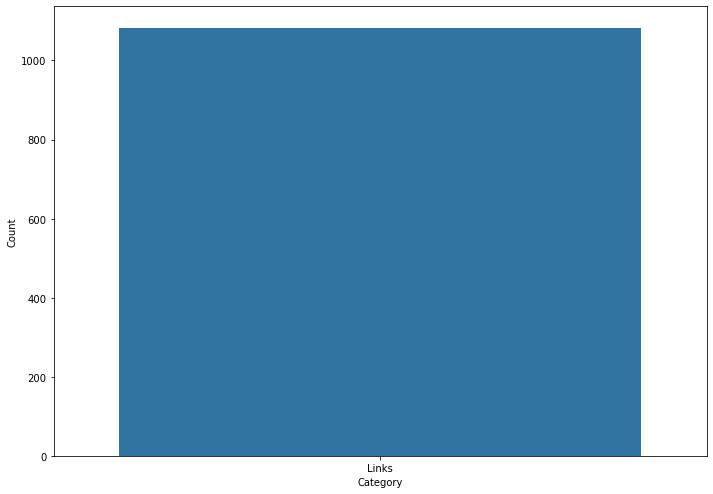

In [19]:
#Categories most selected for coping
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
CCategories=Coping["Category"].value_counts()
df_CCategories = pd.DataFrame(CCategories)
df_CCategories = df_CCategories.reset_index()
df_CCategories.columns = ['Category', "Count"] 
df_CCategories = df_CCategories.sort_values('Count').reset_index()
sb.barplot(x="Category", y="Count", data=df_CCategories, order=df_CCategories['Category'])

<AxesSubplot:xlabel='Category', ylabel='Count'>

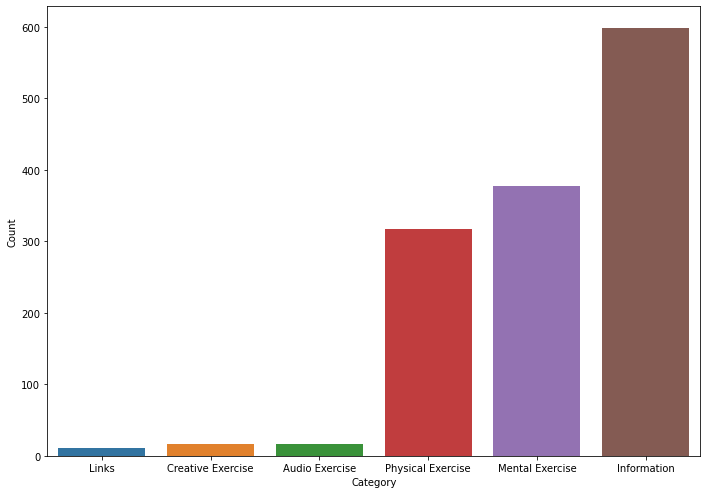

In [20]:
#Categories most selected for depression
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
DCategories=Depression["Category"].value_counts()
df_DCategories = pd.DataFrame(DCategories)
df_DCategories = df_DCategories.reset_index()
df_DCategories.columns = ['Category', "Count"] 
df_DCategories = df_DCategories.sort_values('Count').reset_index()
sb.barplot(x="Category", y="Count", data=df_DCategories, order=df_DCategories['Category'])

<AxesSubplot:xlabel='Category', ylabel='Count'>

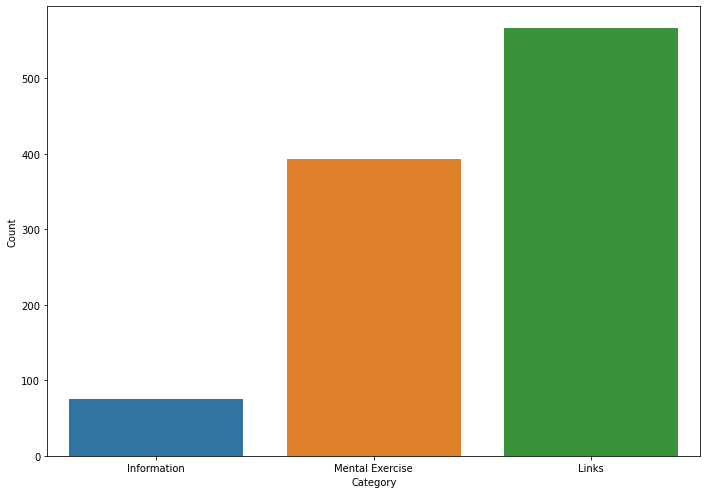

In [21]:
#Categories most selected for Loneliness
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
LCategories=Lonely["Category"].value_counts()
df_LCategories = pd.DataFrame(LCategories)
df_LCategories = df_LCategories.reset_index()
df_LCategories.columns = ['Category', "Count"] 
df_LCategories = df_LCategories.sort_values('Count').reset_index()
sb.barplot(x="Category", y="Count", data=df_LCategories, order=df_LCategories['Category'])

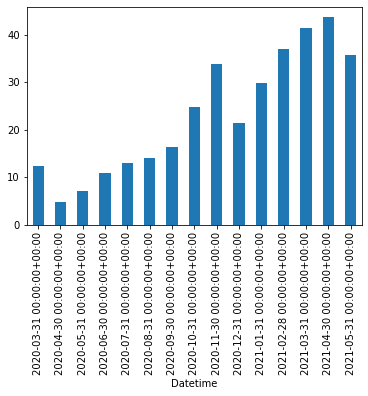

In [22]:
#Mean daily page visits each month. Note data ends halfway though final month
df['Datetime'] = pd.to_datetime(df['start_time'])
df = df.set_index('Datetime')
daily = df.groupby(pd.Grouper(freq='D'))["id"].count()
monthly = daily.groupby(pd.Grouper(freq='M')).mean()
ax = monthly.plot(kind='bar')